<a href="https://colab.research.google.com/github/arjnmj/ML-Fraud-Detection/blob/main/RFClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df['Hour'] = (df['Time'] / 3600) % 24
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23.996111
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23.996389
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23.996667
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23.996667


In [4]:
import numpy as np
# Create cyclic features
df['Time_sin'] = np.sin((2 * np.pi * df['Hour']) / 24)
df['Time_cos'] = np.cos((2 * np.pi * df['Hour']) / 24)

# Drop the original 'Time' and 'Hour' columns
df = df.drop(columns=['Time', 'Hour'])
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_sin,Time_cos
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,1.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,1.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000073,1.000000
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000073,1.000000
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000145,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.001018,0.999999
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.000945,1.000000
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-0.000873,1.000000
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.000873,1.000000


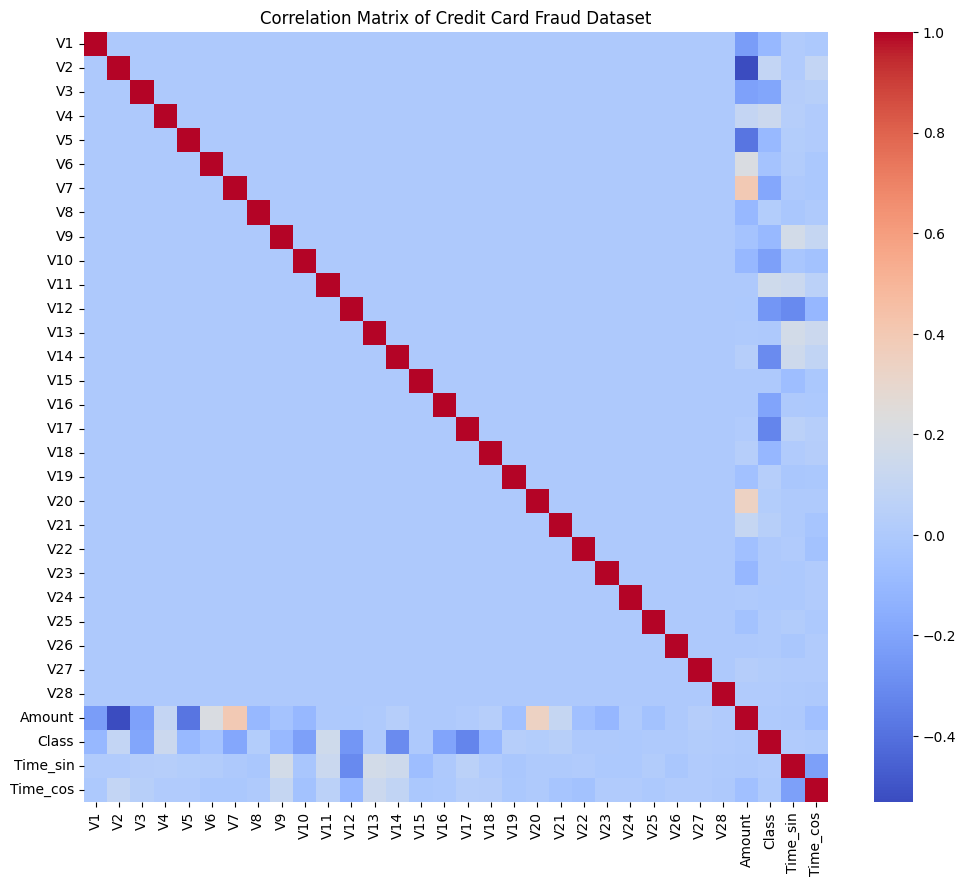

In [6]:
# prompt: correlation matrix plot

import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Credit Card Fraud Dataset')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Assuming 'Class' is the column representing the target variable
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())


(227845, 31) (56962, 31) (227845,) (56962,)
Class
0    227451
1       394
Name: count, dtype: int64
Class
0    56864
1       98
Name: count, dtype: int64


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='log2',
    class_weight={0: 1, 1: 9},
    bootstrap=True,
    oob_score=True,             # Use out-of-bag samples for validation
    random_state=42,            # For reproducibility
    n_jobs=-1
)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[56848    16]
 [   15    83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.85      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



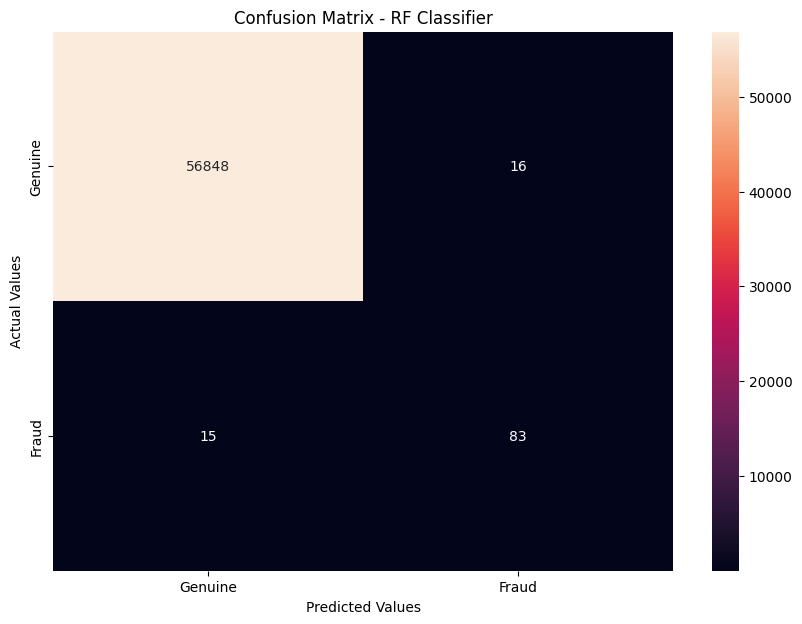

In [8]:
cm = confusion_matrix(y_test, y_pred)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - RF Classifier')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

In [10]:


from sklearn.metrics import fbeta_score

# ... (Your existing code) ...

# Calculate F2 score
f2 = fbeta_score(y_test, y_pred, beta=2)

# ... (Your existing code) ...


metrics1 = [['Accuracy',(accuracy_score(y_test, y_pred))],
                         ['Precision',precision_score(y_test, y_pred)],
                         ['Recall', recall_score(y_test, y_pred)],
                         ['F1_score',f1_score(y_test, y_pred)],
                         ['F2_score', f2]] #added f2 score here
metrics1_df = pd.DataFrame(metrics1, columns = ['Metrics', 'Results'])
metrics1_df


,Metrics,Results
0,Accuracy,0.999456
1,Precision,0.838384
2,Recall,0.846939
3,F1_score,0.842640
4,F2_score,0.845214


In [13]:
y_scores = rf_classifier.predict_proba(X_test)[:, 1]  # Probability of the positive class
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, fbeta_score
import numpy as np

thresholds = np.arange(0.0, 1.0, 0.01)
results = []

for thresh in thresholds:
    y_pred = (y_scores >= thresh).astype(int)  # Apply threshold
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((thresh, precision, recall, f1, f2, accuracy))

# Print or analyze results
for thresh, prec, rec, f1, f2, acc in results:
    print(f"Threshold: {thresh:.2f}, Precision: {prec:.8f}, Recall: {rec:.8f}, F1: {f1:.8f}, F2:{f2:.8f}, Accuracy: {acc:.8f}")

Threshold: 0.00, Precision: 0.00172045, Recall: 1.00000000, F1: 0.00343498, F2:0.00854343, Accuracy: 0.00172045
Threshold: 0.01, Precision: 0.05690537, Recall: 0.90816327, F1: 0.10709988, F2:0.22750511, Accuracy: 0.97394754
Threshold: 0.02, Precision: 0.13244048, Recall: 0.90816327, F1: 0.23116883, F2:0.41823308, Accuracy: 0.98960711
Threshold: 0.03, Precision: 0.20649652, Recall: 0.90816327, F1: 0.33648393, F2:0.54070474, Accuracy: 0.99383800
Threshold: 0.04, Precision: 0.27936508, Recall: 0.89795918, F1: 0.42615012, F2:0.62234795, Accuracy: 0.99583933
Threshold: 0.05, Precision: 0.35772358, Recall: 0.89795918, F1: 0.51162791, F2:0.68965517, Accuracy: 0.99705067
Threshold: 0.06, Precision: 0.41232227, Recall: 0.88775510, F1: 0.56310680, F2:0.72139303, Accuracy: 0.99763000
Threshold: 0.07, Precision: 0.46276596, Recall: 0.88775510, F1: 0.60839161, F2:0.75000000, Accuracy: 0.99803378
Threshold: 0.08, Precision: 0.50588235, Recall: 0.87755102, F1: 0.64179104, F2:0.76512456, Accuracy: 0.9


Confusion Matrix for Threshold 0.56:
[[56853    11]
 [   15    83]]


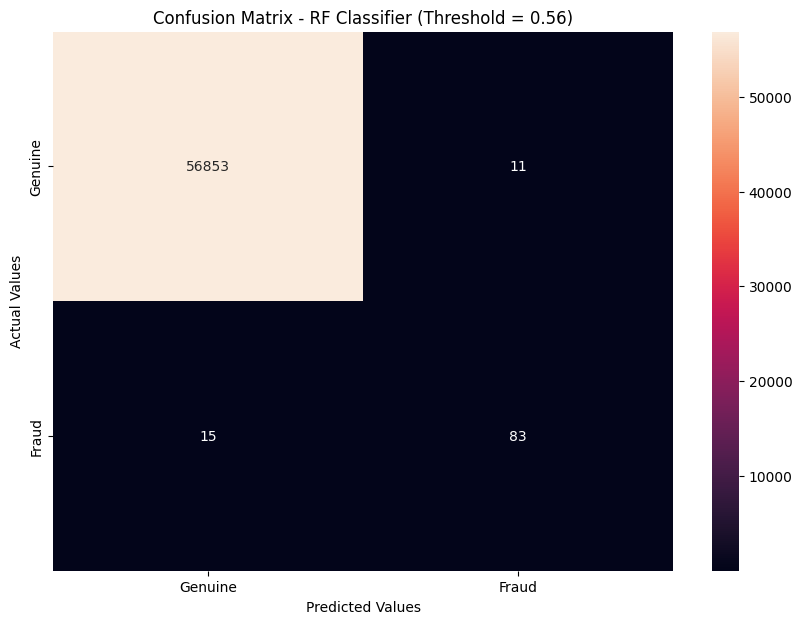

In [14]:
# prompt: confusion matric with above code for the threshold 0.56

# ... (Your existing code) ...

# Assuming 'y_scores' contains predicted probabilities
# and you want the confusion matrix for a threshold of 0.56

threshold = 0.56
y_pred_thresh = (y_scores >= threshold).astype(int)

# Now calculate the confusion matrix for this specific threshold
cm_thresh = confusion_matrix(y_test, y_pred_thresh)

# Print the confusion matrix
print(f"\nConfusion Matrix for Threshold {threshold:.2f}:")
print(cm_thresh)

# Visualization for the specific threshold
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(cm_thresh, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title(f'Confusion Matrix - RF Classifier (Threshold = {threshold:.2f})')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()
